<a href="https://colab.research.google.com/github/freehtet/Machine-Learning/blob/main/wai_yann_htet_m505a_intro_to_ai_and_machine_learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction


Financial strategy department has requested to build a mechine learning model regarding the financial risk for loan approval. Company want to make sure to reduce the humman error by creating mechine learning modle which can generate the risk score based on provided features. So, that company can reduce the risk of losing the loan. As per requirement, the model would be able to predict the risk score with low error measured by mean absolute error and mean squared error.


The dataset includes the following Target/features:

Target:
* RiskScore: Risk assessment score

Features:
* ApplicationDate: Loan application date
* Age: Applicant's age
* AnnualIncome: Yearly income
* CreditScore: Creditworthiness score
* Employment Status: Job situation
* Education Level: Highest education attained
* Experience: Work experience
* LoanAmount: Requested loan size
* LoanDuration: Loan repayment period
* MaritalStatus: Applicant's marital state
* NumberOfDependents: Number of dependents
* HomeOwnershipStatus: Homeownership type
* MonthlyDebtPayments: Monthly debt obligations
* CreditCardUtilizationRate: Credit card usage percentage
* NumberOfOpenCreditLines: Active credit lines
* NumberOfCreditInquiries: Credit checks count
* DebtToIncomeRatio: Debt to income proportion
* BankruptcyHistory: Bankruptcy records
* LoanPurpose: Reason for loan
* PreviousLoanDefaults: Prior loan defaults
* PaymentHistory: Past payment behavior
* LengthOfCreditHistory: Credit history duration
* SavingsAccountBalance: Savings account amount
* CheckingAccountBalance: Checking account funds
* TotalAssets: Total owned assets
* TotalLiabilities: Total owed debts
* MonthlyIncome: Income per month
* UtilityBillsPaymentHistory: Utility payment record
* JobTenure: Job duration
* NetWorth: Total financial worth
* BaseInterestRate: Starting interest rate
* InterestRate: Applied interest rate
* MonthlyLoanPayment: Monthly loan payment
* TotalDebtToIncomeRatio: Total debt against income
* LoanApproved: Loan approval status

Data Source: https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval?select=Loan.csv


#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Data Collecting



In [ ]:
df = pd.read_csv('Loan.csv')

In [ ]:
df.shape

(20000, 36)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

#Dropping Application Date
Since we are going to analyse the risk score the application date should not be requiered to include as a feature.

In [ ]:
df.drop('ApplicationDate', axis=1, inplace=True)

#Checking missing value

In [ ]:
if df.isna().sum().sum() == 0:
  print('Data is clean, No missing data')

Data is clean, No missing data


Checking the correleation of RiskScore and LoanApproved. 'Risk Score' has the strong negative correlation with 'Loan Approved'. 'Risk Score' has the positive correlation with Debt related features and 'BankruptcyHistory'.

In [ ]:
df.corr()[['RiskScore','LoanApproved']]

,RiskScore,LoanApproved
Age,-0.164304,0.141029
AnnualIncome,-0.483289,0.597900
CreditScore,-0.240198,0.142000
Experience,-0.166496,0.140755
LoanAmount,0.137981,-0.239496
LoanDuration,0.054550,-0.094558
NumberOfDependents,0.001686,0.001717
MonthlyDebtPayments,0.036938,-0.070415
CreditCardUtilizationRate,0.108758,-0.010466
NumberOfOpenCreditLines,0.007762,-0.004769


Checking distribution of Age of the customers

<AxesSubplot:>

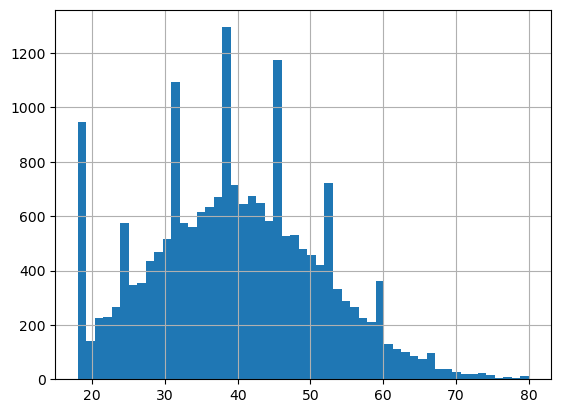

In [ ]:
df['Age'].hist(bins='auto')

Checking loan approval based on credit Score.
We can assume that the higher the credit score, the higher the approval rate.

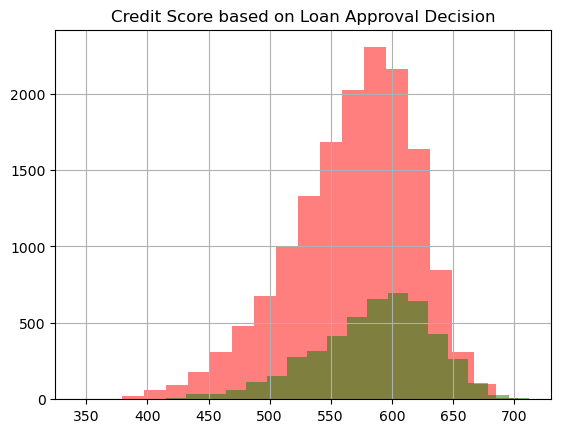

In [ ]:
df[df['LoanApproved']==0]['CreditScore'].hist(bins=20, color='red', alpha=0.5, )
df[df['LoanApproved']==1]['CreditScore'].hist(bins=20, color='green', alpha=0.5)
plt.title('Credit Score based on Loan Approval Decision');

calculation of overall loan approval rate.

In [ ]:
print(f"Loan Approval Percentage(%){(100* df[df['LoanApproved']==1]['CreditScore'].count()/len(df)):.2f}%.")

Loan Approval Percentage(%)23.90%.


Checking of Annual Income and Credit Score for loan approval.
Regardless of credit score, if customers have high income, customer may have higher chance to get loan approved.

<AxesSubplot:xlabel='AnnualIncome', ylabel='CreditScore'>

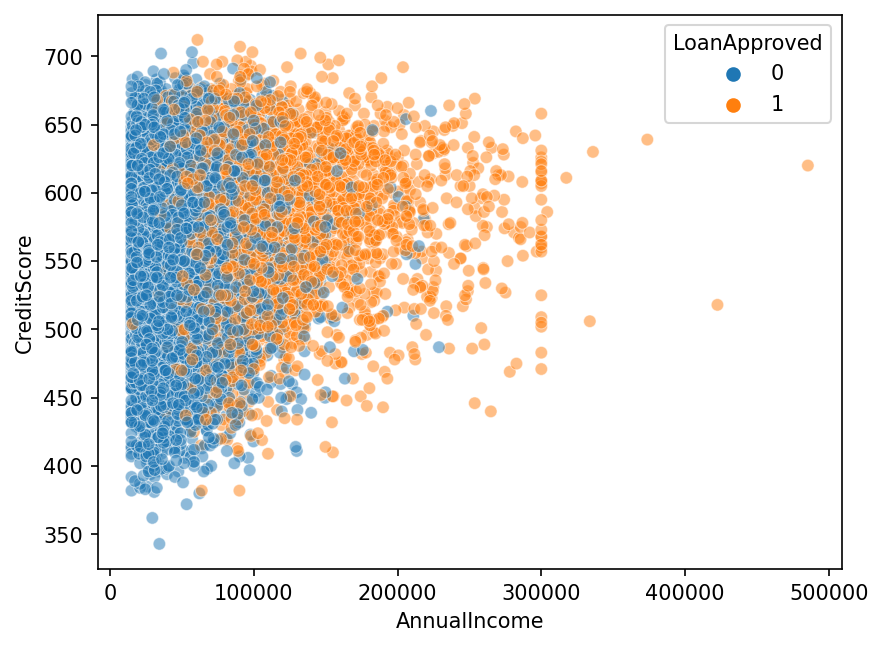

In [ ]:
plt.figure(dpi=150)
sns.scatterplot(x='AnnualIncome',y='CreditScore', data=df, hue='LoanApproved', alpha=0.5)

Checking the distribution of risk score, the lot of people are in the riage of between 50 and 60.

<AxesSubplot:>

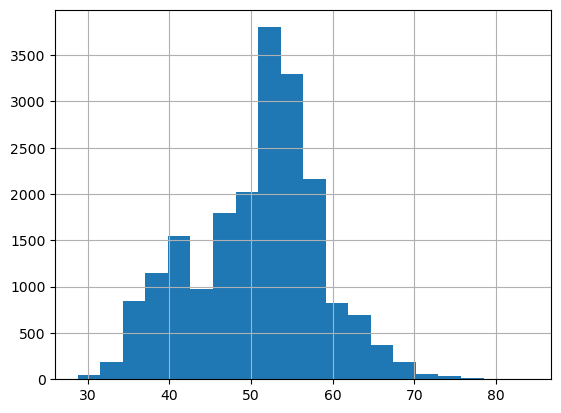

In [ ]:
df['RiskScore'].hist(bins=20)

RISK SCORE seem balance with some few outliners with avg around 53. For credit score, it is avg around 575. Annual income have a lot of outliers who are high income.

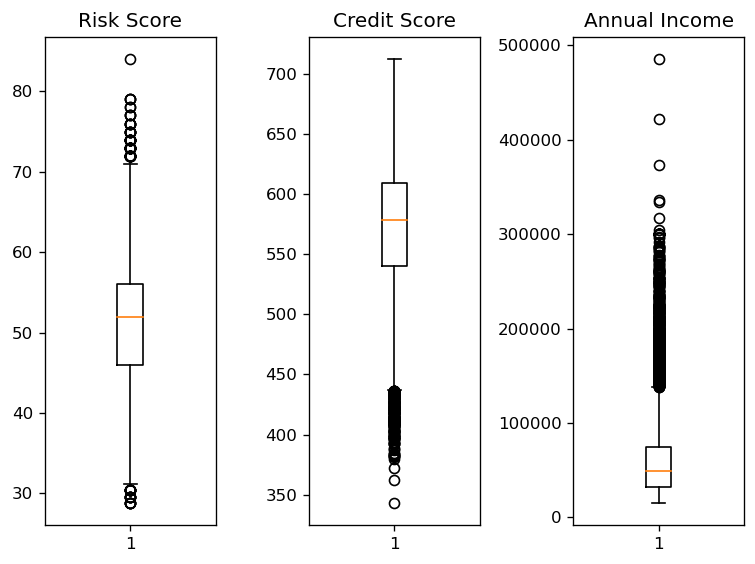

In [ ]:
fig, axes = plt.subplots(1,3, dpi=120)

axes[0].boxplot(df['RiskScore'])
axes[0].set_title('Risk Score')

axes[1].boxplot(df['CreditScore'])
axes[1].set_title('Credit Score')

axes[2].boxplot(df['AnnualIncome'])
axes[2].set_title('Annual Income')

plt.tight_layout()

#Splitting Features and the Target Label

assignment of features and label

In [ ]:
X = df.drop('RiskScore', axis=1)
y = df['RiskScore']

converting categorial features into dummies

In [ ]:
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')

In [ ]:
X = pd.get_dummies(X,columns=cat_col, drop_first=True)

train test split of the features and label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Scaling the data with standard scaler

In [ ]:
scaler = StandardScaler()

Fitting and tranforming for training dataset

In [ ]:
scaler_X_train = scaler.fit_transform(X_train)

Transforming for test dataset

In [ ]:
scaler_X_test = scaler.transform(X_test)

#Building the models to predict Risk score

#Model 1
Building Model with ElasticNet and GridSearchCV.

ElasticNet has been used because it is the linear regression model with the combination of L1 and L2 regularizer

In [ ]:
enet_model = ElasticNet()

creating the parameters with different alphas and L1-L2 ratio to find best score

In [ ]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1,.5,.7,.95,.99,1]}

creating grid model by using GridSearchCV. So that, this model can perform cross validation (5) and finding best alpha and l1_ratio with scoring negative mean squred error.

In [ ]:
grid_model = GridSearchCV(estimator= enet_model,
                          param_grid= param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5)

Training the model

In [ ]:
grid_model.fit(scaler_X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

here is model's best hyper parameters

In [ ]:
print(f"Best Parameter: {grid_model.best_params_}")
print(f"Best Score    : {grid_model.best_score_}")
print(f"Best Estimator: {grid_model.best_estimator_}")

Best Parameter: {'alpha': 0.1, 'l1_ratio': 0.95}
Best Score    : -3.7525004817526386
Best Estimator: ElasticNet(alpha=0.1, l1_ratio=0.95)


predicting the result with testing data

In [ ]:
y_pred = grid_model.predict(scaler_X_test)

checking the model performance with mean absolute error, mean squared error and R2 Score.

In [ ]:
print('-------------------------------')
print('Result with ElesticNet model')
print('-------------------------------')
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Square Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

-------------------------------
Result with ElesticNet model
-------------------------------
Mean Absolute Error: 1.5367179616312805
Mean Square Error: 2.023320407020559
R2 Score: 0.9331205088201903


#Model 2
RandomForestRegressor has been implemented for second optional model

building the model with the Random Foreset Regressor for regression with parameter of random_state and criterion with squared error. Other parameters are default. n_estimators will also be default with 100.

In [ ]:
rfr_model = RandomForestRegressor(random_state=42, criterion='squared_error')

training the model

In [ ]:
rfr_model.fit(scaler_X_train, y_train)

RandomForestRegressor(random_state=42)

predicting the result with testing data

In [ ]:
y_rfr_pred = rfr_model.predict(scaler_X_test)

In [ ]:
print('-------------------------------')
print('Result with Random Forest')
print('-------------------------------')
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_rfr_pred)}")
print(f"Mean Square Error: {np.sqrt(mean_squared_error(y_test, y_rfr_pred))}")
print(f"R2 Score: {r2_score(y_test, y_rfr_pred)}")

-------------------------------
Result with Random Forest
-------------------------------
Mean Absolute Error: 0.6992593333333335
Mean Square Error: 1.0862314903678068
R2 Score: 0.980724377391075


performing random forest regressor with different n_estimators with GridSearchCV with crossvalidation 5 and scoring with negative mean squared error.

In [ ]:
param_grid_rfr = {'n_estimators':[50,100,150]}

In [ ]:
rfr_grid_model = GridSearchCV(estimator= rfr_model,
                          param_grid= param_grid_rfr,
                          scoring='neg_mean_squared_error',
                          cv=5)

training the model

In [ ]:
rfr_grid_model.fit(scaler_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

Checking best parameter

In [ ]:
rfr_grid_model.best_params_

{'n_estimators': 150}

Predicting with the random forest regressor with grid model.

In [ ]:
rfr_grid_y_pred = rfr_grid_model.predict(scaler_X_test)

In [ ]:
print('-------------------------------------------')
print('Result with Random Forest with GridSearchCV')
print('-------------------------------------------')
print(f"Mean Absolute Error: {mean_absolute_error(y_test, rfr_grid_y_pred)}")
print(f"Mean Square Error: {np.sqrt(mean_squared_error(y_test, rfr_grid_y_pred))}")
print(f"R2 Score: {r2_score(y_test, rfr_grid_y_pred)}")

-------------------------------------------
Result with Random Forest with GridSearchCV
-------------------------------------------
Mean Absolute Error: 0.6968988888888892
Mean Square Error: 1.079735172331795
R2 Score: 0.9809542475959393


#Model 3
Building model with Support Vector Machine for regression
(Linear Support Vector Regression). Creating SVR with default except kernel = 'linear'. Also using GridSearchCV for crossvalidation.

In [ ]:
svr = SVR()

Creating parameter

In [ ]:
param_grid_svr = {
    'kernel': ['linear'],
    }

Building the model

In [ ]:
grid_svr_model = GridSearchCV(estimator= svr,
                          param_grid= param_grid_svr,
                          scoring='neg_mean_squared_error',
                          cv=5)

Training the model

In [ ]:
grid_svr_model.fit(scaler_X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), param_grid={'kernel': ['linear']},
             scoring='neg_mean_squared_error')

Predicting the SVR model

In [ ]:
svr_grid_y_pred = grid_svr_model.predict(scaler_X_test)

In [ ]:
print('-------------------------------------------------------')
print('Result with Support Vector Regression with GridSearchCV')
print('-------------------------------------------------------')
print(f"Mean Absolute Error: {mean_absolute_error(y_test, svr_grid_y_pred)}")
print(f"Mean Square Error: {np.sqrt(mean_squared_error(y_test, svr_grid_y_pred))}")
print(f"R2 Score: {r2_score(y_test, svr_grid_y_pred)}")

-------------------------------------------------------
Result with Support Vector Regression with GridSearchCV
-------------------------------------------------------
Mean Absolute Error: 1.4801227145088534
Mean Square Error: 2.0844523707961584
R2 Score: 0.9290181051095435


#Conclusion

Since multiple modles (ElasticNet, Random Forest Regressor, Support Vector Regression with GridSearchCV ) have built and test with testing set, the final model has been recommended with the model evaluation with mean absolute error, mean squared error and R2 Score. As of the result, all the models' performance are not very different. However, Model 2, Random Forest Regressor with 'n_estimators': 150 with GridSearchCV model, has been recommended due to lowest error(mean squared error and mean absolute error) and highest R2 Score compared to other model.